In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [26]:
df = pd.read_excel(r"C:\Users\ashmi\Downloads\Telco-Customer-Churn.xlsx")

In [27]:
print(df.head(50))
df.shape


    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male      

(7043, 21)

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(df['TotalCharges'])

0       2985.00
1       1889.50
2       1397.95
3       1397.95
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [30]:
df['Churn_Flag'] = df['Churn'].map({'Yes': 1 , 'No' : 0})

In [31]:
df[['Churn' , 'Churn_Flag']]

,Churn,Churn_Flag
0,No,0
1,No,0
2,Yes,1
3,No,0
4,Yes,1
...,...,...
7038,No,0
7039,No,0
7040,No,0
7041,Yes,1


In [36]:
churn_rate = df['Churn_Flag'].mean()*100
print(f"{churn_rate:.2f}")

26.54


In [40]:
contract_churn = df.groupby('Contract')['Churn_Flag'].mean()*100
print(
    contract_churn)

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn_Flag, dtype: float64


In [45]:
payment_churn = df.groupby('PaymentMethod')['Churn_Flag'].mean()*100
#print(f"{payment_churn:.2f}")
# print(f"{method}: {rate:.2f}%")
print(payment_churn.round(2))

PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: Churn_Flag, dtype: float64


In [53]:
df['Tenure_Group'] = pd.cut(df['tenure'],
                            bins = [0,12,24,48,72],

                            labels = ['0-12' , '13-24', '25-48', '49-72'])
tenure_rate = df.groupby('tenure')['Churn_Flag'].mean()*100
print(tenure_rate)


 
                            

tenure
0      0.000000
1     61.990212
2     51.680672
3     47.000000
4     47.159091
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Churn_Flag, Length: 73, dtype: float64


In [55]:
print(df['Tenure_Group'])

0        0-12
1       25-48
2        0-12
3       25-48
4        0-12
        ...  
7038    13-24
7039    49-72
7040     0-12
7041     0-12
7042    49-72
Name: Tenure_Group, Length: 7043, dtype: category
Categories (4, object): ['0-12' < '13-24' < '25-48' < '49-72']


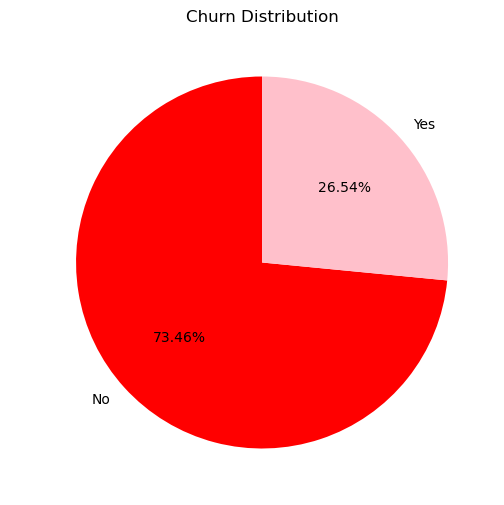

In [56]:
plt.figure(figsize=(6,8))
df['Churn'].value_counts().plot.pie(autopct='%.2f%%',
                                    startangle=90,
                                    colors=['red','pink'])
plt.title("Churn Distribution")
plt.ylabel(" ")
plt.show()

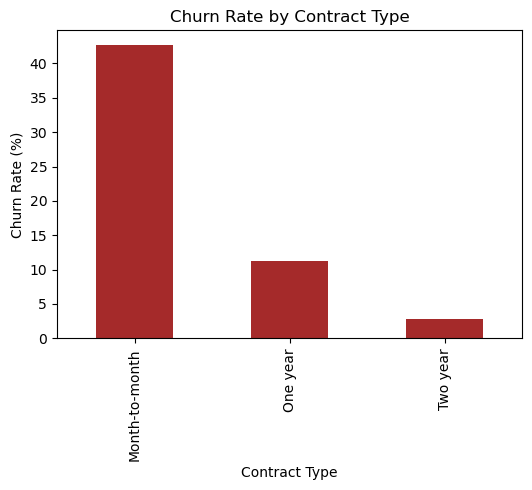

In [59]:
plt.figure(figsize=(6,4))
contract_churn.plot.bar(color='brown')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Contract Type")
plt.show()

In [60]:
# Step 8: Simple Rule-Based Prediction
# Rule: Month-to-Month contract + High Monthly Charges → likely churn
df['Predicted_Churn'] = np.where((df['Contract']=="Month-to-month") & 
                                 (df['MonthlyCharges']>80), 1, 0)

In [61]:
# Step 9: Accuracy of Rule
accuracy = np.mean(df['Predicted_Churn'] == df['Churn_Flag']) * 100
print(f"\n🤖 Simple Rule-Based Prediction Accuracy: {accuracy:.2f}%")


🤖 Simple Rule-Based Prediction Accuracy: 74.36%


In [62]:
high_risk = df[
    (df['Contract'] == 'Month-to-month') &
    (df['MonthlyCharges'] > df['MonthlyCharges'].mean()) &
    (df['tenure'] < 12)
]

print("High risk customers:", high_risk.shape[0])


High risk customers: 935
